# UNI vs H-Optimus 

***Imports***

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import pandas as pd

BASE_PATH = "/kaggle/input/uni-vs-h-optimus-wsi-results"

uni_full = pd.read_csv(f"{BASE_PATH}/uni_method_comparison_full.csv")
hop_full = pd.read_csv(f"{BASE_PATH}/hoptimus_method_comparison_full.csv")


In [10]:
print("UNI columns:", uni_full.columns.tolist())
print("H-OPTIMUS columns:", hop_full.columns.tolist())

assert set(uni_full.columns) == set(hop_full.columns)


UNI columns: ['method', 'val_auc', 'test_auc', 'test_acc', 'test_precision', 'test_recall']
H-OPTIMUS columns: ['method', 'val_auc', 'test_auc', 'test_acc', 'test_precision', 'test_recall']


In [13]:
uni_best = uni_full.sort_values("test_auc", ascending=False).iloc[0]
hop_best = hop_full.sort_values("test_auc", ascending=False).iloc[0]

***Comparison Table***

In [14]:
comparison_df = pd.DataFrame([
    {
        "Model": "UNI",
        "Best Method": uni_best["method"],
        "Val AUC": uni_best["val_auc"],
        "Test AUC": uni_best["test_auc"],
        "Accuracy": uni_best["test_acc"],
        "Precision": uni_best["test_precision"],
        "Recall": uni_best["test_recall"],
    },
    {
        "Model": "H-OPTIMUS",
        "Best Method": hop_best["method"],
        "Val AUC": hop_best["val_auc"],
        "Test AUC": hop_best["test_auc"],
        "Accuracy": hop_best["test_acc"],
        "Precision": hop_best["test_precision"],
        "Recall": hop_best["test_recall"],
    }
]).round(4)

comparison_df


,Model,Best Method,Val AUC,Test AUC,Accuracy,Precision,Recall
0,UNI,Max Pooling + LogReg,0.6667,0.80,0.6667,0.625,1.0
1,H-OPTIMUS,Attention MIL (Ensemble),0.6667,0.65,0.5556,1.000,0.2


In [15]:
comparison_df.to_csv("uni_vs_hoptimus_best_comparison.csv", index=False)
print("✓ Saved: uni_vs_hoptimus_best_comparison.csv")

✓ Saved: uni_vs_hoptimus_best_comparison.csv


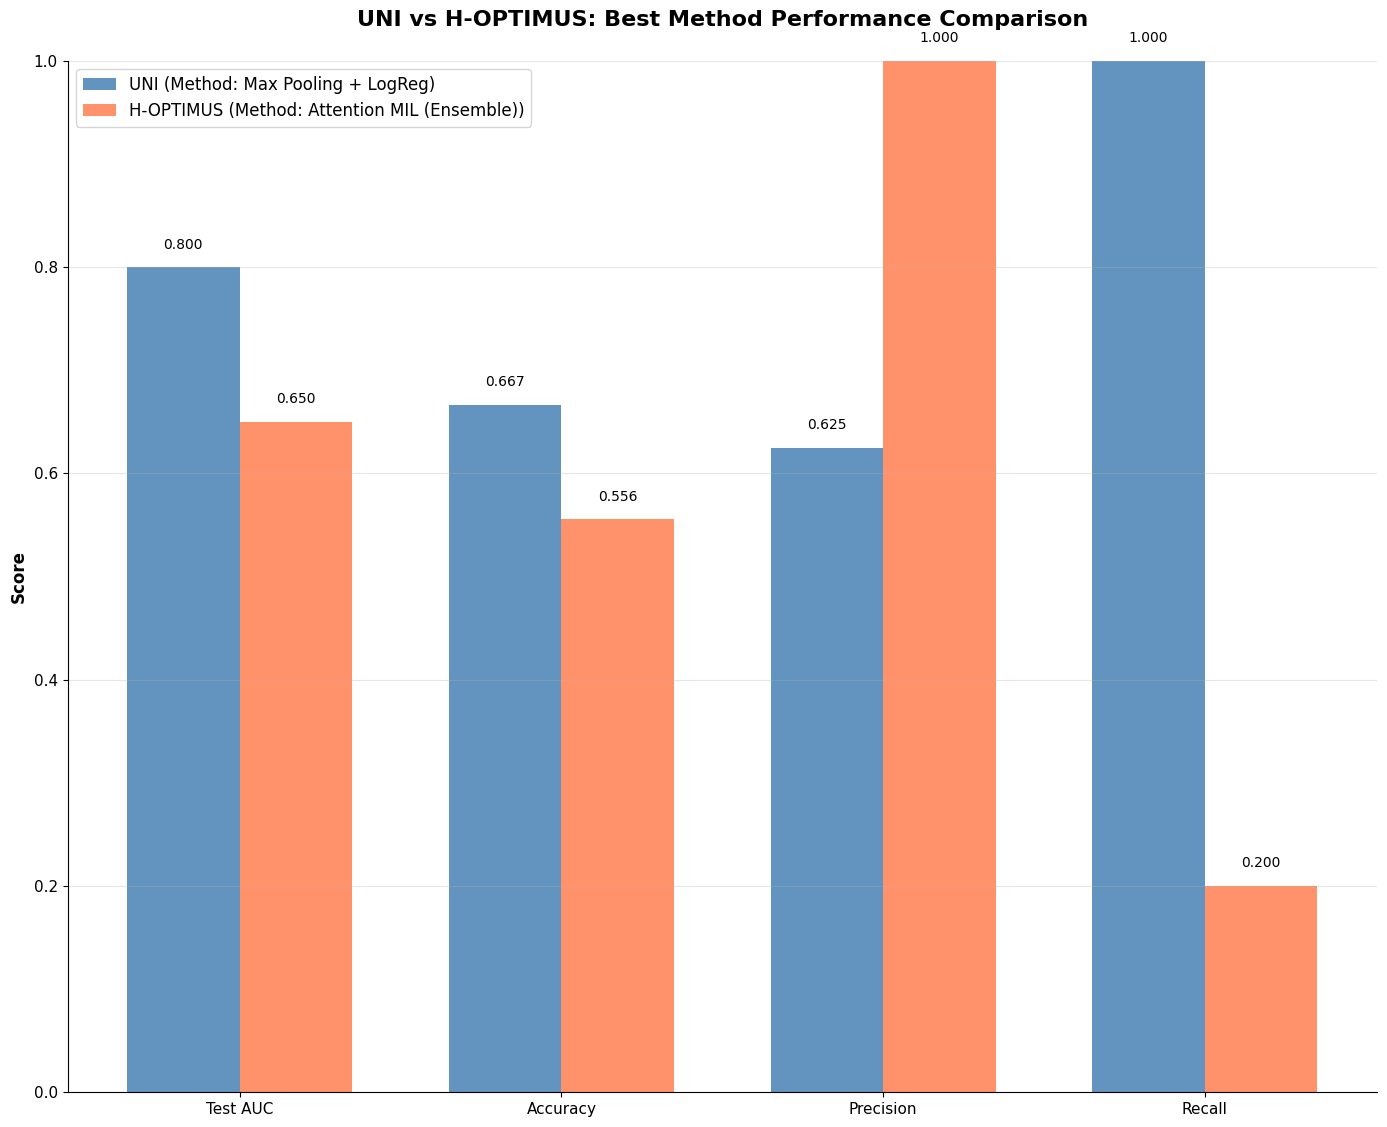

In [24]:
metrics = ["Test AUC", "Accuracy", "Precision", "Recall"]
x = np.arange(len(metrics))
width = 0.35

# Extract method names
uni_method = comparison_df.loc[
    comparison_df["Model"] == "UNI", "Best Method"
].values[0]

hop_method = comparison_df.loc[
    comparison_df["Model"] == "H-OPTIMUS", "Best Method"
].values[0]

uni_scores = comparison_df.loc[
    comparison_df["Model"] == "UNI", metrics
].values.flatten()

hop_scores = comparison_df.loc[
    comparison_df["Model"] == "H-OPTIMUS", metrics
].values.flatten()

# Match your reference figure dimensions
fig, ax = plt.subplots(figsize=(14, 12))

bars_uni = ax.bar(
    x - width/2,
    uni_scores,
    width,
    label=f"UNI (Method: {uni_method})",
    alpha=0.85,
    color="steelblue"
)

bars_hop = ax.bar(
    x + width/2,
    hop_scores,
    width,
    label=f"H-OPTIMUS (Method: {hop_method})",
    alpha=0.85,
    color="coral"
)

# Axis formatting
ax.set_ylabel("Score", fontsize=12, fontweight="bold")
ax.set_title(
    "UNI vs H-OPTIMUS: Best Method Performance Comparison",
    fontsize=16,
    fontweight="bold",
    pad=25
)

ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.set_ylim(0, 1.0)

# Grid & legend
ax.grid(axis="y", alpha=0.3)
ax.legend(fontsize=12)

# Annotate bars
for bars in [bars_uni, bars_hop]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.015,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontsize=10
        )

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("uni_vs_hoptimus_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


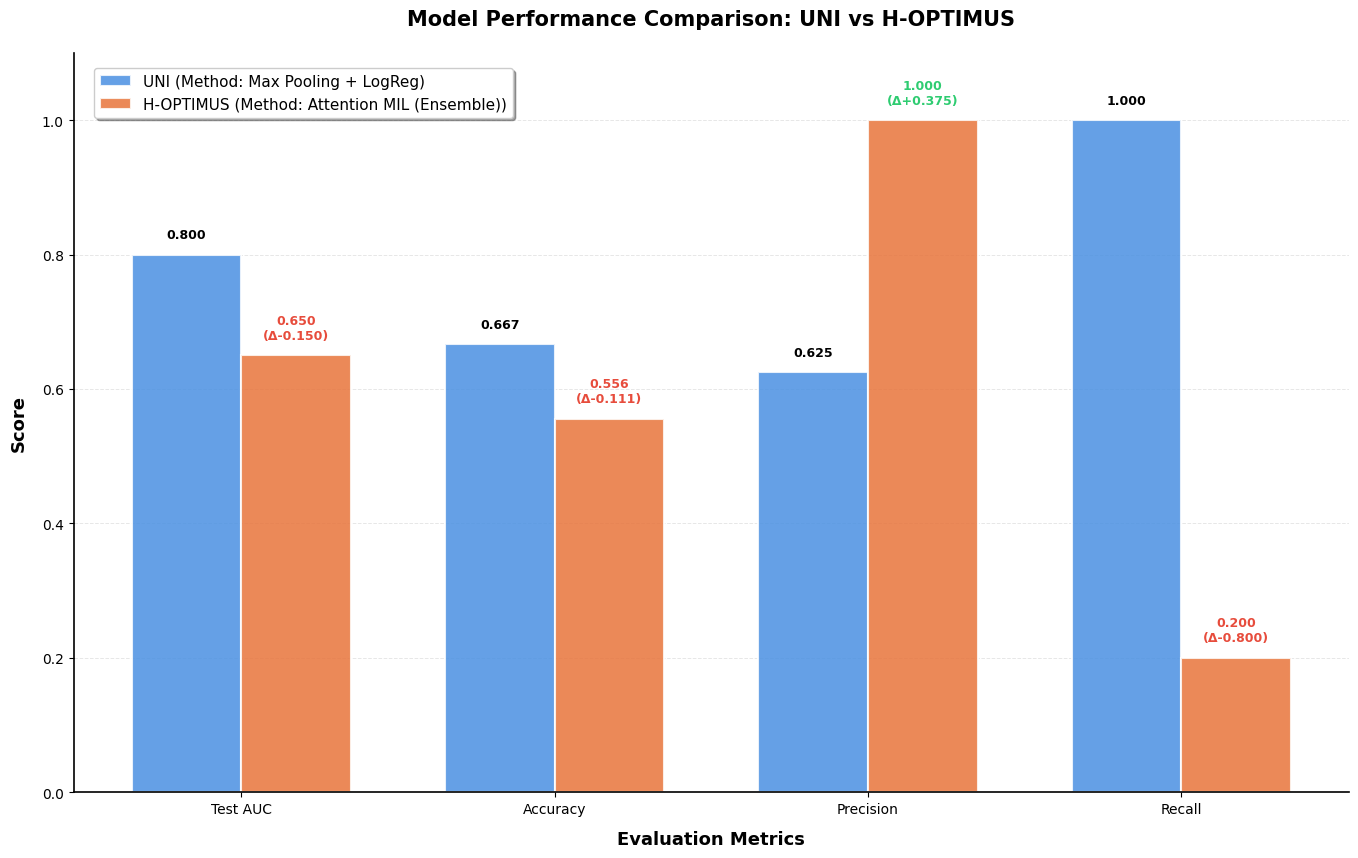

✓ figure saved to: uni_vs_hoptimus_comparison.png


In [33]:
metrics = ["Test AUC", "Accuracy", "Precision", "Recall"]
x = np.arange(len(metrics))
width = 0.35

# Extract methods
uni_method = comparison_df.loc[
    comparison_df["Model"] == "UNI", "Best Method"
].values[0]
hop_method = comparison_df.loc[
    comparison_df["Model"] == "H-OPTIMUS", "Best Method"
].values[0]

# Scores
uni_scores = comparison_df.loc[
    comparison_df["Model"] == "UNI", metrics
].values.flatten()
hop_scores = comparison_df.loc[
    comparison_df["Model"] == "H-OPTIMUS", metrics
].values.flatten()

# Delta (H-OPTIMUS - UNI)
delta = (
    comparison_df
    .set_index("Model")[metrics]
    .diff()
    .loc["H-OPTIMUS"]
    .values
)

# Create figure with adjusted spacing
fig, ax = plt.subplots(figsize=(14, 9))

# Add extra space at top for annotations
ax.set_ylim([0, 1.1])

# Plot bars
bars1 = ax.bar(
    x - width/2,
    uni_scores,
    width,
    label=f"UNI (Method: {uni_method})",
    alpha=0.85,
    color="#4A90E2",
    edgecolor="white",
    linewidth=1.5
)
bars2 = ax.bar(
    x + width/2,
    hop_scores,
    width,
    label=f"H-OPTIMUS (Method: {hop_method})",
    alpha=0.85,
    color="#E8743B",
    edgecolor="white",
    linewidth=1.5
)

# Labels with proper spacing
ax.set_xlabel("Evaluation Metrics", fontsize=13, fontweight="bold", labelpad=10)
ax.set_ylabel("Score", fontsize=13, fontweight="bold", labelpad=10)
ax.set_title(
    "Model Performance Comparison: UNI vs H-OPTIMUS",
    fontsize=15,
    fontweight="bold",
    pad=20  # Increased padding to prevent overlap
)

# Customize ticks
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11, fontweight="500")
ax.tick_params(axis='both', which='major', labelsize=10)

# Legend with better styling
ax.legend(
    fontsize=11,
    frameon=True,
    shadow=True,
    fancybox=True,
    loc='upper left',
    bbox_to_anchor=(0.01, 0.99)
)

# Grid styling
ax.grid(axis="y", alpha=0.3, linestyle="--", linewidth=0.7)
ax.set_axisbelow(True)

# Spine styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Annotate UNI bars
for bar in bars1:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.02,
        f"{h:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="600"
    )

# Annotate H-OPTIMUS bars with Delta
for i, bar in enumerate(bars2):
    h = bar.get_height()
    d = delta[i]
    color = "#2ECC71" if d > 0 else "#E74C3C"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.02,
        f"{h:.3f}\n(Δ{d:+.3f})",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
        color=color
    )

# Apply tight layout with padding
plt.tight_layout(pad=2.0)

# Save with high quality
plt.savefig("uni_vs_hoptimus_comparison.png", dpi=300, bbox_inches="tight", facecolor='white')
plt.show()

print("✓ figure saved to: uni_vs_hoptimus_comparison.png")

In [34]:
from IPython.display import FileLink

# Display download link
FileLink('uni_vs_hoptimus_comparison.png')

/kaggle/working/uni_vs_hoptimus_comparison.png